In [1]:
import numpy as np
import matplotlib.pyplot as plt
import sys
sys.path.append('/Users/brandonmanley/Desktop/PhD/oam_pheno/dijet_dsa')
import dsa_mc.dijet as dijet
import random
from IPython.display import display, Math

# setup plotting
plt.rcParams["font.family"] = "Times New Roman"
plt.rcParams["font.size"] = 16
plt.rcParams["legend.fontsize"] = 12
plt.rcParams["axes.labelsize"] = 16  
plt.rcParams["xtick.labelsize"] = 14  
plt.rcParams["ytick.labelsize"] = 14
plt.rcParams["axes.titlesize"] = 18  
plt.rcParams["text.usetex"] = True
plt.rcParams["text.latex.preamble"] = r"\usepackage{amsmath}"
%config InlineBackend.figure_format = 'retina'

In [2]:
dj = dijet.DIJET(replica=4, constrained_moments=True, fit_type='pp')

roots = 95

space = {
    'y' : [0.05, 0.95],
    'z' : [0.2, 0.5],
    'Q2' : [16, 100],
    't' : [0.01, 0.04],
    'phi_Dp': [0, 2*np.pi],
    'phi_kp': [0, 2*np.pi]
}

data = {}
methods = ['riemann', 'gauss-legendre', 'mc']
weights = ['1', 'cos(phi_Dp)', 'cos(phi_Dp)cos(phi_kp)', 'sin(phi_Dp)sin(phi_kp)']
for m in methods:
    data[m] = {}
    for w in weights: data[m][w] = []

points = {'riemann': 3, 'gauss-legendre': 4, 'mc': 50}
pT_values = np.linspace(1,10,10)
for m in methods:
    den = dj.get_integrated_xsec(pT_values, roots**2, space, points=points[m], kind='den', method=m)
    for w in weights:
        print(m,w)
        num = dj.get_integrated_xsec(pT_values, roots**2, space, points=points[m], kind='num', weight=w, method=m)
        data[m][w] = num/den

np.save('predictions/integral_testing.npy', data, allow_pickle=True)


--> !!! Using constrained moment parameters!
--> loaded unpol. amp. data from /dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
--> loaded pol. amp. data from /dipoles/d05-rc/
--> loaded params from /dipoles/replica_params_pp_2.csv
--> loaded random moment params from /dipoles/moment_params_pp.csv
--> loaded replica 4
riemann 1
riemann cos(phi_Dp)
riemann cos(phi_Dp)cos(phi_kp)
riemann sin(phi_Dp)sin(phi_kp)
gauss-legendre 1
gauss-legendre cos(phi_Dp)
gauss-legendre cos(phi_Dp)cos(phi_kp)
gauss-legendre sin(phi_Dp)sin(phi_kp)
mc 1
mc cos(phi_Dp)
mc cos(phi_Dp)cos(phi_kp)
mc sin(phi_Dp)sin(phi_kp)


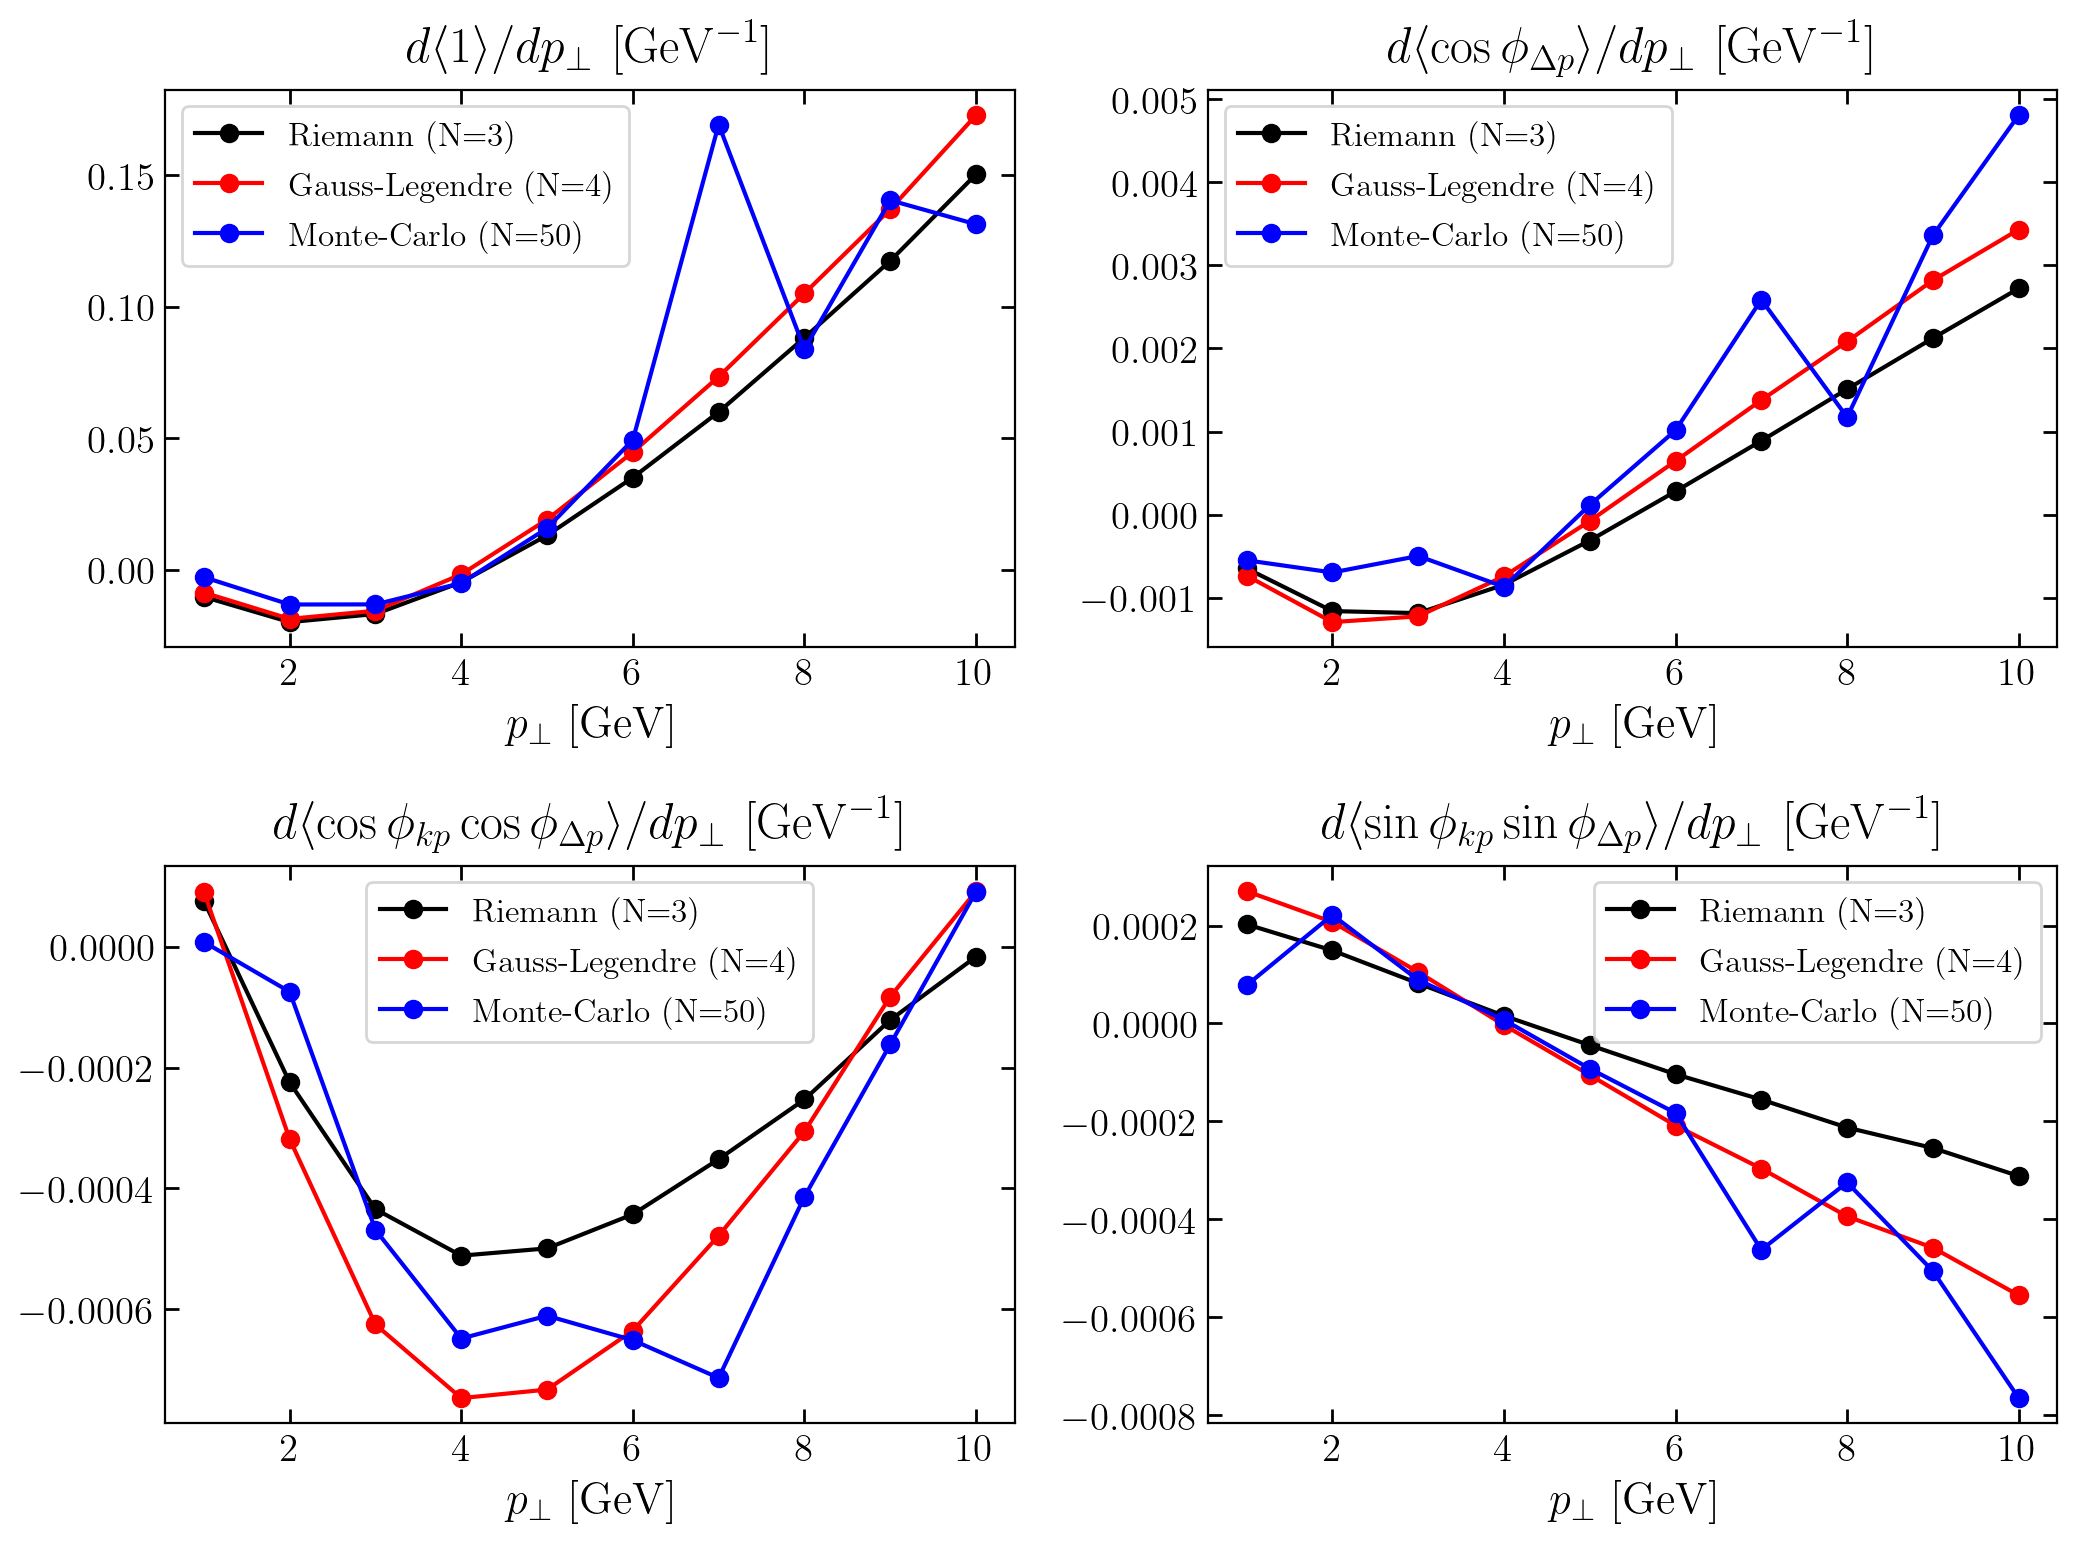

In [3]:
data = np.load('predictions/integral_testing.npy', allow_pickle=True).item()
pT_values = np.linspace(1,10,10) # check to make sure same as above!!

asp_ratio = 4/3
psize = 4
nrows, ncols = 2,2
fig, ax = plt.subplots(nrows, ncols, figsize=(asp_ratio*psize*nrows, psize*ncols))

colors = ['black', 'red', 'blue']
labels = ['Riemann (N=3)', 'Gauss-Legendre (N=4)', 'Monte-Carlo (N=50)']
# labels = ['Gauss-Legendre (N=4)']
axs = [(irow,icol) for irow in range(nrows) for icol in range(ncols)]

# methods = ['gauss-legendre']
for i, meth in enumerate(methods):
    for j, weight in enumerate(data[meth]):
        ax[axs[j]].plot(pT_values, data[meth][weight], color=colors[i], label=labels[i], marker='o')

for iax in axs:
    ax[iax].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
    ax[iax].set_xlabel(r'$p_{\perp}$ [GeV]')
    ax[iax].legend()
    # ax[iax].semilogy()

ax[0,0].set_title(r'$d \langle 1 \rangle /d p_\perp \,\,[\mathrm{GeV}^{-1}]$', pad=10)
ax[0,1].set_title(r'$d \langle \cos \phi_{\Delta p}  \rangle /d p_\perp \,\,[\mathrm{GeV}^{-1}]$', pad=10)
ax[1,0].set_title(r'$d \langle \cos \phi_{k p}  \cos \phi_{\Delta p}  \rangle /d p_\perp \,\,[\mathrm{GeV}^{-1}]$', pad=10)
ax[1,1].set_title(r'$d \langle  \sin \phi_{k p}  \sin \phi_{\Delta p}  \rangle /d p_\perp \,\,[\mathrm{GeV}^{-1}]$', pad=10)

plt.tight_layout()
plt.show()

# fig.savefig('plots/integration_methods.pdf', dpi=700)


In [5]:
ben_data = {
    '1': np.array([
        -0.005250755892955926,
        -0.011885122277384329,
        -0.010829147758208061,
        -0.0027542054840524795,
        0.010344677414996926,
        0.027099664837235925,
        0.046073494357960765,
        0.06760964280327209,
        0.08909321284977724,
        0.11387648549908982]),
    'cos(phi_Dp)': np.array([
        -0.0004083330378020427,
        -0.0007854283916235575,
        -0.0008016394430364716,
        -0.0005443463491255555,
        -0.00014064175084214464,
        0.00031961727093248805,
        0.0007968548570354954,
        0.001273798734429082,
        0.0017548360554752295,
        0.002189809198596657]),
    'cos(phi_Dp)cos(phi_kp)': np.array([
        5.51051739531711e-05,
        -0.00015354363551777617,
        -0.0003400505634485693,
        -0.0004362156252649453,
        -0.00045012955303408366,
        -0.00041130161893383814,
        -0.00032759650360200134,
        -0.00023058224811844873,
        -9.906720512158319e-05,
        1.0445205133586798e-05]),
    'sin(phi_Dp)sin(phi_kp)': np.array([
        0.00026970721342433056,
        0.0001412510477445477,
        6.881525549207415e-05,
        8.406778021912412e-06,
        -5.303842075906397e-05,
        -0.00012225258092534217,
        -0.0001887357979732984,
        -0.0002675503023617412,
        -0.00032760911927366796,
        -0.0004117558643491522])
}
    
                       
        


from tabulate import tabulate

table_data = [[pT, data['gauss-legendre']['1'][ipT]/ben_data['1'][ipT], data['gauss-legendre']['cos(phi_Dp)'][ipT]/ben_data['cos(phi_Dp)'][ipT], data['gauss-legendre']['cos(phi_Dp)cos(phi_kp)'][ipT]/ben_data['cos(phi_Dp)cos(phi_kp)'][ipT], data['gauss-legendre']['sin(phi_Dp)sin(phi_kp)'][ipT]/ben_data['sin(phi_Dp)sin(phi_kp)'][ipT]] for ipT, pT in enumerate(pT_values)] 
# for ipT, pT in enumerate(pT_values):
#     print
#     print(w)
#     print(data['gauss-legendre'][w])
headers = ['pT', '<1>', '<cos>', '<coscos>', '<sinsin>']
print(tabulate(table_data, headers=headers))




  pT      <1>    <cos>    <coscos>    <sinsin>
----  -------  -------  ----------  ----------
   1  1.64936  1.79989    1.66246     1.00175
   2  1.57163  1.64901    2.07279     1.467
   3  1.43881  1.52933    1.83879     1.52736
   4  0.63117  1.36706    1.71287    -0.378657
   5  1.84786  0.55582    1.62859     1.98591
   6  1.65189  2.01659    1.54488     1.70457
   7  1.59364  1.72886    1.45977     1.56968
   8  1.55495  1.63625    1.32482     1.4724
   9  1.53925  1.60745    0.831589    1.39796
  10  1.51845  1.56739    8.83959     1.34791


In [18]:
dj = dijet.DIJET(replica=4, constrained_moments=True, fit_type='pp')

roots = 95

space = {
    'y' : [0.05, 0.95],
    'z' : [0.2, 0.5],
    'Q2' : [16, 100],
    't' : [0.01, 0.04],
    'phi_Dp': [0, 2*np.pi],
    'phi_kp': [0, 2*np.pi]
}

data = {}
methods = ['riemann', 'gauss-legendre', 'mc']
for m in methods:
    data[m] = {}
    for w in ['den', 'num']:
        data[m][w] = []

points = np.arange(3, 10)
pT_values = [3]
for pts in points:
    print(pts)
    for m in methods:
        if m=='mc': pts*=100
        for f in ['num', 'den']:
            v = dj.get_integrated_xsec(pT_values, roots**2, space, points=pts, kind=f, method=m)[0]
            data[m][f].append(v)

    np.save('predictions/integral_testing_points.npy', data, allow_pickle=True)


--> !!! Using constrained moment parameters!
--> loaded unpol. amp. data from /dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
--> loaded pol. amp. data from /dipoles/d05-rc/
--> loaded params from /dipoles/replica_params_pp_2.csv
--> loaded random moment params from /dipoles/moment_params_pp.csv
--> loaded replica 4
3
4
5
6
7
8
9


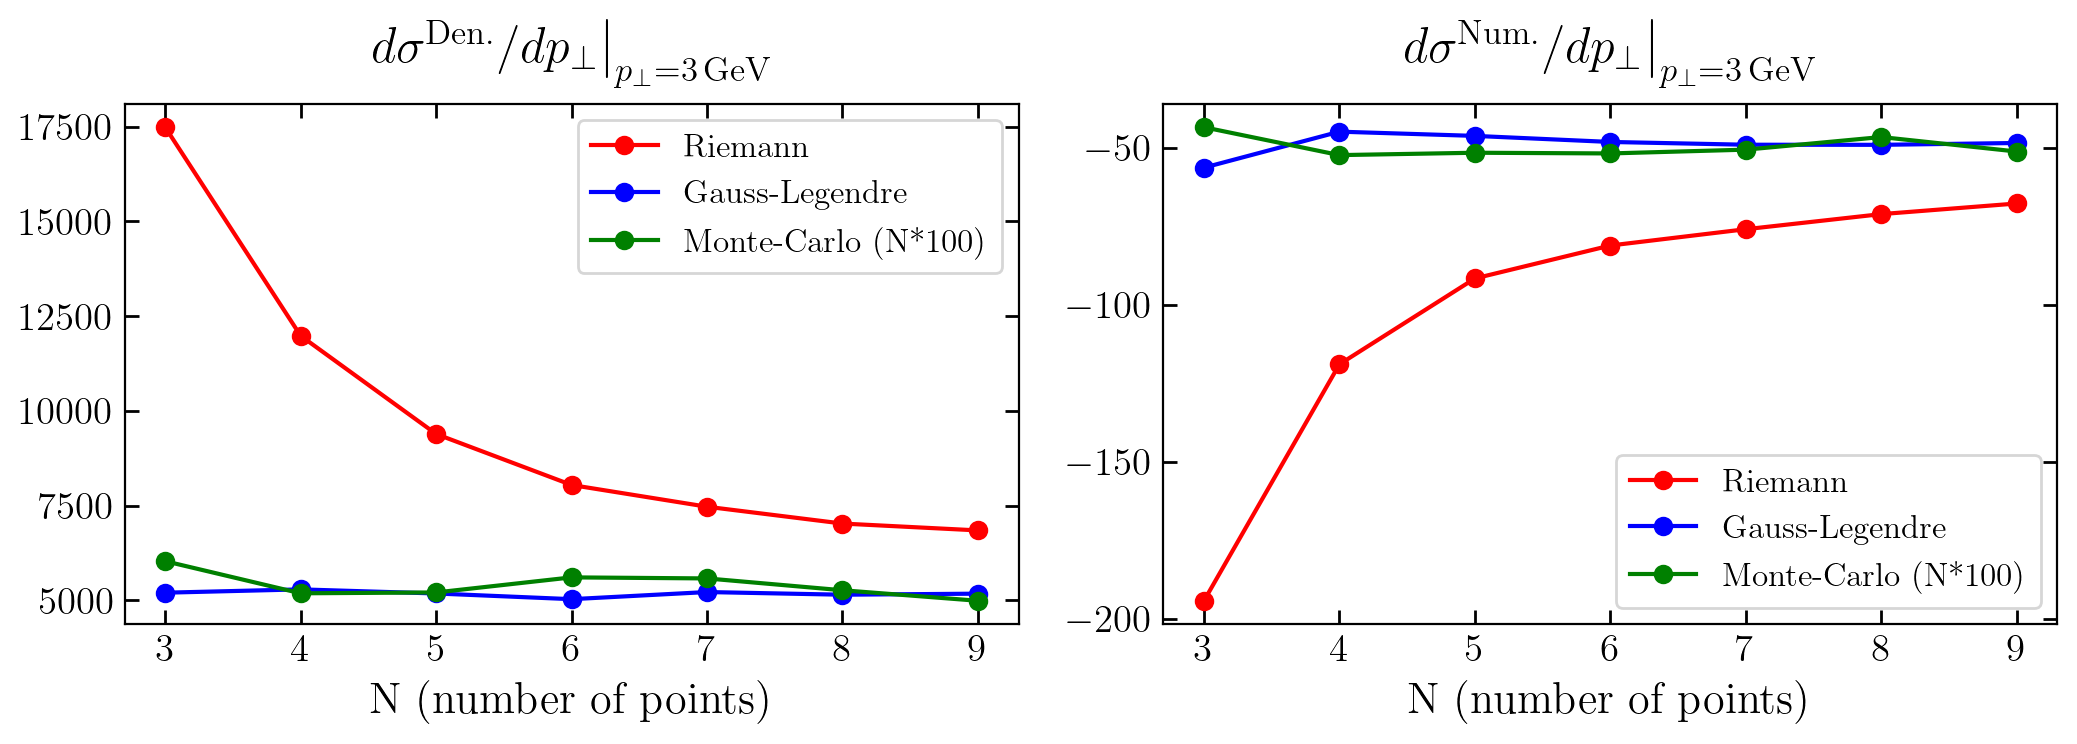

In [19]:
conv_data = np.load('predictions/integral_testing_points.npy', allow_pickle=True).item()

asp_ratio = 4/3
psize = 4

nrows, ncols = 1,2
fig, axs = plt.subplots(nrows, ncols, figsize=(asp_ratio*psize*ncols, psize*nrows))

points = np.arange(3, len(conv_data['riemann']['den']) + 3)

colors = ['r', 'b', 'g']
labels = ['Riemann', 'Gauss-Legendre', 'Monte-Carlo (N*100)']

for iax, weight in enumerate(['den', 'num']):
    for iapp, approx in enumerate(['riemann', 'gauss-legendre', 'mc']):
        axs[iax].plot(points, conv_data[approx][weight], label=labels[iapp], color=colors[iapp], marker='o')

    axs[iax].legend()
    # axs[iax].semilogy()
    axs[iax].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)
    axs[iax].set_xlabel('N (number of points)')
    axs[iax].tick_params(axis="both", direction="in", length=5, width=1, which='both', right=True, top=True)

axs[0].set_title(r'$ d \sigma^{\mathrm{Den.}} / d p_\perp \big |_{p_\perp = 3\, \mathrm{GeV} } $', pad=15)
axs[1].set_title(r'$ d \sigma^{\mathrm{Num.}} / d p_\perp \big |_{p_\perp = 3\, \mathrm{GeV} } $', pad=15)

plt.tight_layout()
plt.show()


# fig.savefig('plots/integrals_points.pdf', dpi=700)

In [3]:
dj = dijet.DIJET(replica=4, constrained_moments=True, fit_type='pp')

s = 95**2
space = {
    'y' : 0.11,
    'z' : 0.4,
    'Q2' : 40,
    't' : 0.02,
    'phi_Dp': [0, 2*np.pi],
    'phi_kp': [0, 2*np.pi]
}
pT = 2.0

num = dj.get_integrated_xsec([pT], s, space, kind='num', points=4)[0]
den = dj.get_integrated_xsec([pT], s, space, kind='den', points=4)[0]

print(num, den, num/den)

--> !!! Using constrained moment parameters!
--> loaded unpol. amp. data from /dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
--> loaded pol. amp. data from /dipoles/d05-rc/
--> loaded params from /dipoles/replica_params_pp_2.csv
--> loaded random moment params from /dipoles/moment_params_pp.csv
--> loaded replica 4
0.4 0.02 0.11 40
1.5515161846463711e-10
0.4 0.02 0.11 40
2.672874555693393e-07
1.5515161846463711e-10 2.672874555693393e-07 0.0005804672656041949


In [4]:
dj = dijet.DIJET(replica=4, constrained_moments=True, fit_type='pp')

s = 95**2
space = {
    'y' : [0.05, 0.95],
    'z' : [0.2, 0.5],
    'Q2' : [16, 100],
    't' : [0.01, 0.04],
    'phi_Dp': [0, 2*np.pi],
    'phi_kp': [0, 2*np.pi]
}
pT = 2.0

num = dj.get_integrated_xsec([pT], s, space, kind='num', points=4)[0]
den = dj.get_integrated_xsec([pT], s, space, kind='den', points=4)[0]

print(num, den, num/den)

--> !!! Using constrained moment parameters!
--> loaded unpol. amp. data from /dipoles/narr_ymin4.61_ymax14.91_AAMS09.dat
--> loaded pol. amp. data from /dipoles/d05-rc/
--> loaded params from /dipoles/replica_params_pp_2.csv
--> loaded random moment params from /dipoles/moment_params_pp.csv
--> loaded replica 4
0.2208295532608921 0.012082955326089214 0.3470085303868147 23.80752094008077
-7.365508209956181e-13
0.2208295532608921 0.012082955326089214 0.3470085303868147 25.910470347568737
-1.1185607214396067e-12
0.2208295532608921 0.012082955326089214 0.3470085303868147 28.654232055648787
-8.61279641744426e-13
0.2208295532608921 0.012082955326089214 0.3470085303868147 30.757181463136753
-3.7949008011418583e-13
0.2208295532608921 0.012082955326089214 0.6529914696131853 25.72487855888405
-2.7413026974393267e-12
0.2208295532608921 0.012082955326089214 0.6529914696131853 35.0236689754036
-2.287355481041462e-12
0.2208295532608921 0.012082955326089214 0.6529914696131853 47.15599369299387
-9.54